In [ ]:
!pip install pandas matplotlib seaborn scikit-learn


# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Verify the installation by printing the versions
print(pd.__version__)
print(sns.__version__)

2.2.2
0.13.2


In [ ]:
# Import necessary libraries
import pandas as pd


# Load the dataset
file_path = 'transactions.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:")
print(df.columns)

# Display the first few rows of the dataset
df.head()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data types of columns
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (10000, 9)

Columns:
Index(['transaction_id', 'customer_id', 'amount', 'timestamp', 'location',
       'merchant_id', 'category', 'device_type', 'is_fraud'],
      dtype='object')

Missing Values:
transaction_id    181
customer_id       326
amount            103
timestamp         206
location          485
merchant_id         0
category            0
device_type       289
is_fraud            0
dtype: int64

Data Types:
transaction_id     object
customer_id        object
amount            float64
timestamp          object
location           object
merchant_id        object
category           object
device_type        object
is_fraud            int64
dtype: object


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Percentage:")
print(missing_percentage)

# Drop rows with missing transaction_id
print("\nDropping rows with missing transaction_id...")
df = df.dropna(subset=['transaction_id'])

# Impute missing values for numerical columns
print("\nImputing missing values for amount...")
df['amount'] = df['amount'].fillna(df['amount'].mean())

# Impute missing values for categorical columns
print("\nImputing missing values for location and device_type...")
df['location'] = df['location'].fillna('Unknown')
df['device_type'] = df['device_type'].fillna('Unknown')

# Verify missing values are handled
print("\nRemaining Missing Values:")
print(df.isnull().sum())



Missing Values:
transaction_id    181
customer_id       326
amount            103
timestamp         206
location          485
merchant_id         0
category            0
device_type       289
is_fraud            0
dtype: int64

Missing Percentage:
transaction_id    1.81
customer_id       3.26
amount            1.03
timestamp         2.06
location          4.85
merchant_id       0.00
category          0.00
device_type       2.89
is_fraud          0.00
dtype: float64

Dropping rows with missing transaction_id...

Imputing missing values for amount...

Imputing missing values for location and device_type...

Remaining Missing Values:
transaction_id      0
customer_id       319
amount              0
timestamp         204
location            0
merchant_id         0
category            0
device_type         0
is_fraud            0
dtype: int64


In [ ]:
# Check the current format of the timestamp column
print("Data type before conversion:", df['timestamp'].dtypes)
print(df['timestamp'].head())

# Convert the timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Handle any rows where conversion failed
df = df.dropna(subset=['timestamp'])

# Extract time-based features
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['month'] = df['timestamp'].dt.month

# Verify the changes
print("Data type after conversion:", df['timestamp'].dtypes)
print(df[['timestamp', 'day_of_week', 'hour', 'month']].head())

Data type before conversion: object
0     10/11/23 7:14
1    11/23/23 11:10
2     12/16/23 6:03
3    11/24/23 21:03
4     12/8/23 20:55
Name: timestamp, dtype: object


<ipython-input-20-c3cb90d8c50d>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


Data type after conversion: datetime64[ns]
            timestamp day_of_week  hour  month
0 2023-10-11 07:14:00   Wednesday     7     10
1 2023-11-23 11:10:00    Thursday    11     11
2 2023-12-16 06:03:00    Saturday     6     12
3 2023-11-24 21:03:00      Friday    21     11
4 2023-12-08 20:55:00      Friday    20     12


<ipython-input-20-c3cb90d8c50d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['timestamp'].dt.day_name()
<ipython-input-20-c3cb90d8c50d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['timestamp'].dt.hour
<ipython-input-20-c3cb90d8c50d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

<ipython-input-21-99eb2820f454>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_amount'] = scaler.fit_transform(df[['amount']])


Original Amount:
count      9615.000000
mean        603.493605
std        7041.232503
min        -100.000000
25%          66.195000
50%         100.630000
75%         134.935000
max      100000.000000
Name: amount, dtype: float64

Normalized Amount:
count    9615.000000
mean        0.007028
std         0.070342
min         0.000000
25%         0.001660
50%         0.002004
75%         0.002347
max         1.000000
Name: normalized_amount, dtype: float64


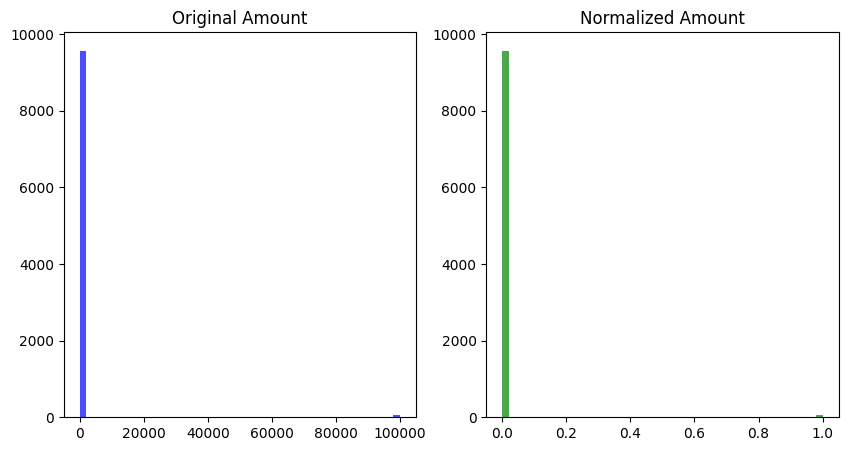

In [ ]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'amount' column
df['normalized_amount'] = scaler.fit_transform(df[['amount']])

# Verify the normalization
print("Original Amount:")
print(df['amount'].describe())

print("\nNormalized Amount:")
print(df['normalized_amount'].describe())

# Optional: Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['amount'], bins=50, color='blue', alpha=0.7)
plt.title('Original Amount')

plt.subplot(1, 2, 2)
plt.hist(df['normalized_amount'], bins=50, color='green', alpha=0.7)
plt.title('Normalized Amount')

plt.show()
